In [82]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
#librerias


In [83]:
df_Alabama = pd.read_parquet("..\\google parquet\\all_Alabama.parquet")
df_Alabama.head()

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text
0,0,Kanisha Mixon,2020-08-11 17:51:12.670,5,Very Personable staff! Beautiful and clean env...,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None
1,1,Brandie Hodges,2021-01-06 02:10:39.594,5,Best clothing intown,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None
2,2,Sharon King,2019-01-11 19:34:50.843,4,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None
3,3,Veronica Pierce,2018-02-04 01:56:43.534,5,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None
4,4,Whitney Waldon Collier,2018-08-26 01:08:38.492,5,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None


In [84]:
df_Alaska= pd.read_parquet("..\\google parquet\\all_Alaska.parquet")
df_Alaska.head()

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text
0,0,Nicki Gore,2019-08-20 20:12:31.619,5,We always stay here when in Valdez for silver ...,0x56b646ed2220b77f:0xd8975e316de80952,NaT,None
1,1,Allen Ratliff,2017-09-09 00:46:22.385,5,Great campground for the price. Nice hot unlim...,0x56b646ed2220b77f:0xd8975e316de80952,NaT,None
2,2,Jonathan Tringali,2016-09-25 01:11:41.185,4,We tent camped here for 2 nights while explori...,0x56b646ed2220b77f:0xd8975e316de80952,NaT,None
3,3,S Blad,2016-09-02 23:22:15.682,4,"This place is just a few miles outside Valdez,...",0x56b646ed2220b77f:0xd8975e316de80952,NaT,None
4,4,Daniel Formoso,2018-06-22 06:43:31.341,5,Probably the nicest and cleanest campground we...,0x56b646ed2220b77f:0xd8975e316de80952,NaT,None


In [7]:
df_Alabama.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id', 'resp_time',
       'resp_text'],
      dtype='object')

In [4]:
df_Alabama["user_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1800000 entries, 0 to 1799999
Series name: user_id
Non-Null Count    Dtype
--------------    -----
1800000 non-null  int64
dtypes: int64(1)
memory usage: 13.7 MB


In [5]:
df_Alabama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   user_id    int64         
 1   name       object        
 2   time       datetime64[ns]
 3   rating     int64         
 4   text       object        
 5   pics       object        
 6   gmap_id    object        
 7   resp_time  datetime64[ns]
 8   resp_text  object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 123.6+ MB


In [2]:
# Obtén la lista de archivos JSON
json_files = glob.glob("..\\Google Maps\\drive-download-20231120T150233Z-001\\metadata-sitios\\*.json")

# Crea una lista vacía para almacenar los dataframes
df_list = []

# Lee cada archivo JSON y agrégalo a la lista de dataframes
for file in json_files:
    df = pd.read_json(file, lines=True)
    df_list.append(df)

# Concatena todos los dataframes en la lista
df = pd.concat(df_list, ignore_index=True)
df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
df["MISC"]

0          {'Service options': ['In-store shopping', 'Sam...
1                                                       None
2          {'Service options': ['Takeout', 'Dine-in', 'De...
3          {'Service options': ['In-store shopping'], 'Pa...
4                   {'Service options': ['In-store pickup']}
                                 ...                        
3025006    {'Service options': ['Curbside pickup', 'No-co...
3025007                                                 None
3025008    {'Accessibility': ['Wheelchair accessible entr...
3025009    {'Service options': ['In-store shopping'], 'Pa...
3025010    {'Accessibility': ['Wheelchair accessible entr...
Name: MISC, Length: 3025011, dtype: object

In [5]:
df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [6]:
merged_df = df_Alabama.merge(df, on='gmap_id')

In [7]:
merged_df.head()

,user_id,name_x,time,rating,text,gmap_id,resp_time,resp_text,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,0,Kanisha Mixon,2020-08-11 17:51:12.670,5,Very Personable staff! Beautiful and clean env...,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None,Purple Peanut,"Purple Peanut, 2357 Whitesburg Dr # D, Huntsvi...",...,-86.574041,[Boutique],4.6,17,None,"[[Thursday, Closed], [Friday, 10AM–5PM], [Satu...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM Fri,"[0x886269389730ce8b:0xedffba4037968914, 0x8862...",https://www.google.com/maps/place//data=!4m2!3...
1,0,Kanisha Mixon,2020-08-11 17:51:12.670,5,Very Personable staff! Beautiful and clean env...,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None,Purple Peanut,"Purple Peanut, 2357 Whitesburg Dr # D, Huntsvi...",...,-86.574041,[Boutique],4.6,17,None,"[[Thursday, Closed], [Friday, 10AM–5PM], [Satu...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM Fri,"[0x886269389730ce8b:0xedffba4037968914, 0x8862...",https://www.google.com/maps/place//data=!4m2!3...
2,1,Brandie Hodges,2021-01-06 02:10:39.594,5,Best clothing intown,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None,Purple Peanut,"Purple Peanut, 2357 Whitesburg Dr # D, Huntsvi...",...,-86.574041,[Boutique],4.6,17,None,"[[Thursday, Closed], [Friday, 10AM–5PM], [Satu...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM Fri,"[0x886269389730ce8b:0xedffba4037968914, 0x8862...",https://www.google.com/maps/place//data=!4m2!3...
3,1,Brandie Hodges,2021-01-06 02:10:39.594,5,Best clothing intown,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None,Purple Peanut,"Purple Peanut, 2357 Whitesburg Dr # D, Huntsvi...",...,-86.574041,[Boutique],4.6,17,None,"[[Thursday, Closed], [Friday, 10AM–5PM], [Satu...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM Fri,"[0x886269389730ce8b:0xedffba4037968914, 0x8862...",https://www.google.com/maps/place//data=!4m2!3...
4,2,Sharon King,2019-01-11 19:34:50.843,4,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,NaT,None,Purple Peanut,"Purple Peanut, 2357 Whitesburg Dr # D, Huntsvi...",...,-86.574041,[Boutique],4.6,17,None,"[[Thursday, Closed], [Friday, 10AM–5PM], [Satu...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM Fri,"[0x886269389730ce8b:0xedffba4037968914, 0x8862...",https://www.google.com/maps/place//data=!4m2!3...


In [8]:
merged_df.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'gmap_id', 'resp_time',
       'resp_text', 'name_y', 'address', 'description', 'latitude',
       'longitude', 'category', 'avg_rating', 'num_of_reviews', 'price',
       'hours', 'MISC', 'state', 'relative_results', 'url'],
      dtype='object')

In [10]:
df_selected = merged_df[['rating', 'gmap_id', 'name_y', 'category', 'avg_rating', 'latitude', 'longitude']]
df_selected.head()

,rating,gmap_id,name_y,category,avg_rating,latitude,longitude
0,5,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,Purple Peanut,[Boutique],4.6,34.713163,-86.574041
1,5,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,Purple Peanut,[Boutique],4.6,34.713163,-86.574041
2,5,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,Purple Peanut,[Boutique],4.6,34.713163,-86.574041
3,5,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,Purple Peanut,[Boutique],4.6,34.713163,-86.574041
4,4,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,Purple Peanut,[Boutique],4.6,34.713163,-86.574041


### 10 primeras categorias con el mejor rating

In [11]:
df = df_selected.explode('category')

In [12]:
df_sorted = df.groupby('category')['avg_rating'].mean().sort_values(ascending=False)
top_10_categories = df_sorted.head(10)

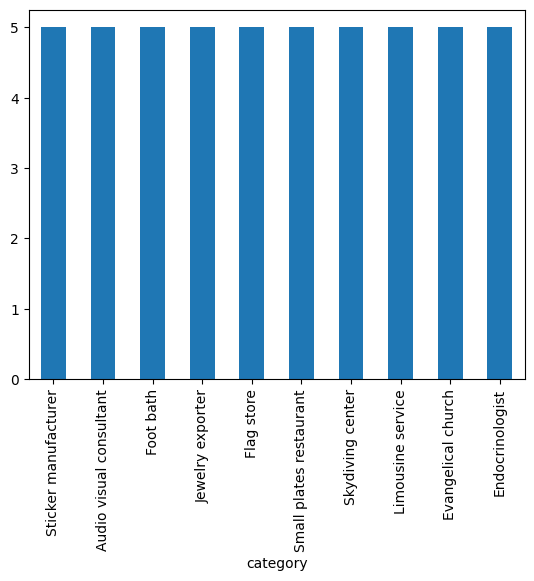

In [13]:
top_10_categories.plot.bar()
plt.show()

In [3]:
df_Arizona= pd.read_parquet("..\\google parquet\\all_Arizona.parquet")
df_metadata = pd.read_csv("..\\GP_Henry\\metadata.csv")


In [4]:
merged_df = df_Arizona.merge(df_metadata, on='gmap_id')

In [6]:
df_selected = merged_df[['rating', 'gmap_id', 'category', 'avg_rating']]
df_selected.head()

,rating,gmap_id,category,avg_rating
0,5,0x872b5dae3c5fcfa7:0xf0f8b286a2537821,['Dentist'],4.8
1,5,0x872b5dae3c5fcfa7:0xf0f8b286a2537821,['Dentist'],4.8
2,5,0x872b5dae3c5fcfa7:0xf0f8b286a2537821,['Dentist'],4.8
3,5,0x872b5dae3c5fcfa7:0xf0f8b286a2537821,['Dentist'],4.8
4,1,0x872b5dae3c5fcfa7:0xf0f8b286a2537821,['Dentist'],4.8


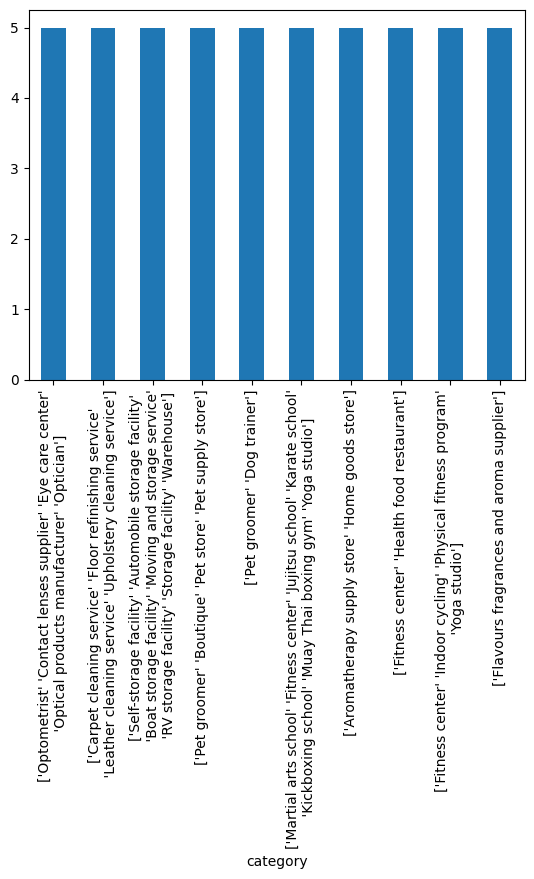

In [7]:
df = df_selected.explode('category')
df_sorted = df.groupby('category')['avg_rating'].mean().sort_values(ascending=False)
top_10_categories = df_sorted.head(10)
top_10_categories.plot.bar()
plt.show()

In [78]:
df_clpe = pd.read_parquet("..\\cantidad_locales_por_estado.parquet")
df_clpe.head()

,Archivo,Restaurant,Auto repair shop,Gas station,Service establishment,Beauty salon,Convenience store,Church,Hair salon,Nail salon,ATM,Park,Doctor,Clothing store,Dentist
0,all_Alabama.parquet,103948.0,21883.0,27887.0,1378.0,13234.0,20989.0,6059.0,11828.0,13714.0,5808.0,12255.0,3185.0,31526.0,5683.0
1,all_Alaska.parquet,9781.0,2856.0,2009.0,99.0,1550.0,445.0,650.0,1355.0,1041.0,266.0,1993.0,80.0,1375.0,769.0
2,all_Arizona.parquet,179946.0,37691.0,22691.0,5791.0,25268.0,22016.0,8282.0,22365.0,29946.0,12843.0,20486.0,8082.0,42661.0,17598.0
3,all_Arkansas.parquet,55150.0,11870.0,20058.0,594.0,7449.0,16487.0,2893.0,6829.0,8497.0,2262.0,9169.0,899.0,14034.0,4216.0
4,all_California.parquet,395627.0,72972.0,41946.0,6841.0,63366.0,29637.0,15666.0,48411.0,59304.0,13832.0,78442.0,5549.0,77876.0,19073.0


In [79]:
df_clpe['Estado_limpio'] = df_clpe['Archivo'].str.replace('all_', '').str.replace('.parquet', '')
df_clpe = df_clpe.drop('Archivo', axis=1)

df_clpe.head()

,Restaurant,Auto repair shop,Gas station,Service establishment,Beauty salon,Convenience store,Church,Hair salon,Nail salon,ATM,Park,Doctor,Clothing store,Dentist,Estado_limpio
0,103948.0,21883.0,27887.0,1378.0,13234.0,20989.0,6059.0,11828.0,13714.0,5808.0,12255.0,3185.0,31526.0,5683.0,Alabama
1,9781.0,2856.0,2009.0,99.0,1550.0,445.0,650.0,1355.0,1041.0,266.0,1993.0,80.0,1375.0,769.0,Alaska
2,179946.0,37691.0,22691.0,5791.0,25268.0,22016.0,8282.0,22365.0,29946.0,12843.0,20486.0,8082.0,42661.0,17598.0,Arizona
3,55150.0,11870.0,20058.0,594.0,7449.0,16487.0,2893.0,6829.0,8497.0,2262.0,9169.0,899.0,14034.0,4216.0,Arkansas
4,395627.0,72972.0,41946.0,6841.0,63366.0,29637.0,15666.0,48411.0,59304.0,13832.0,78442.0,5549.0,77876.0,19073.0,California


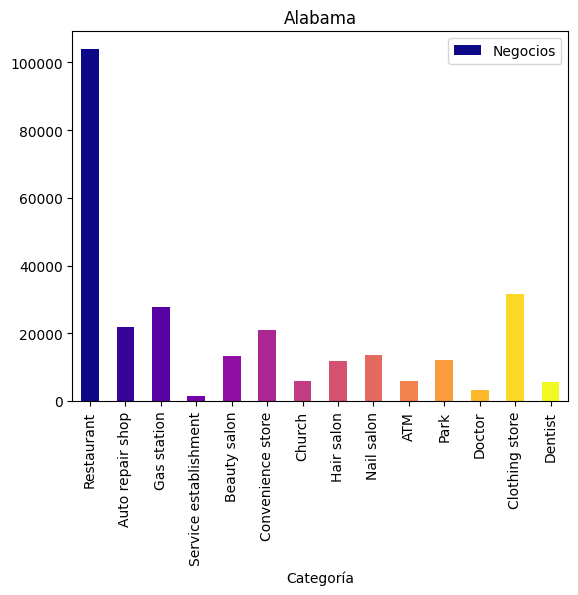

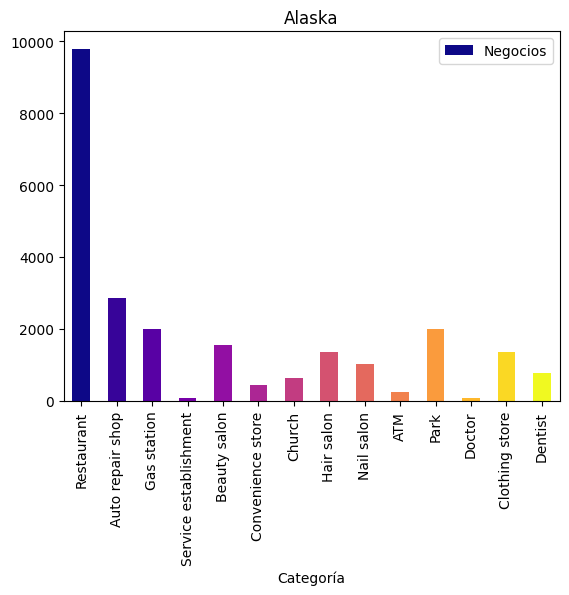

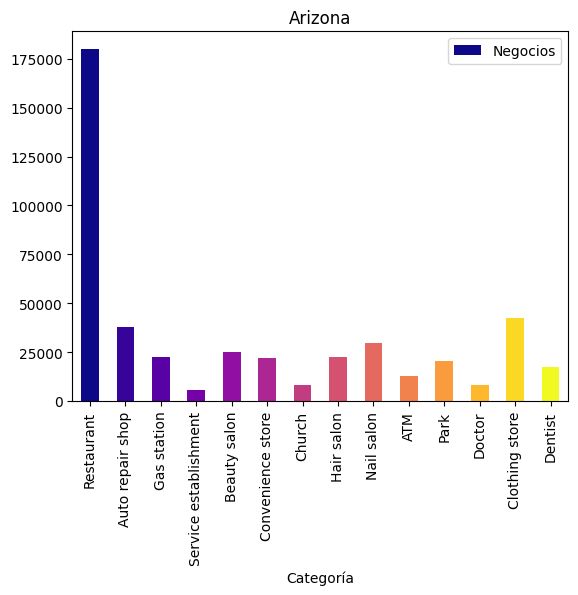

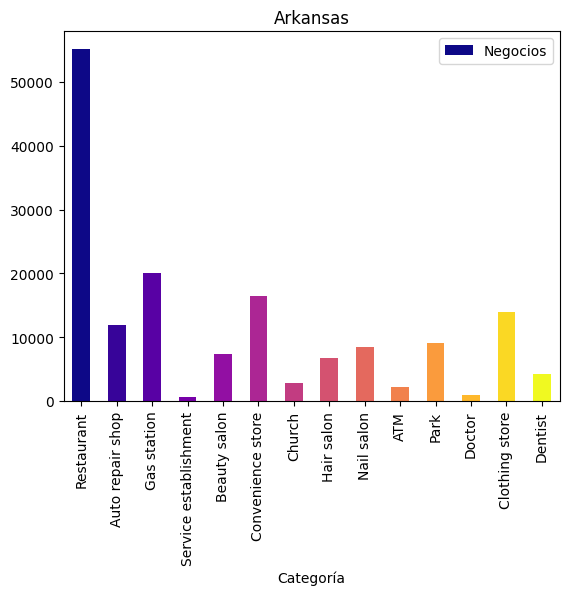

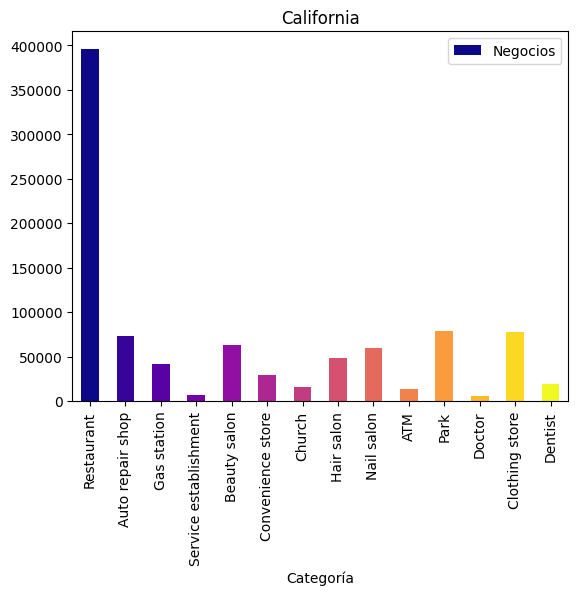

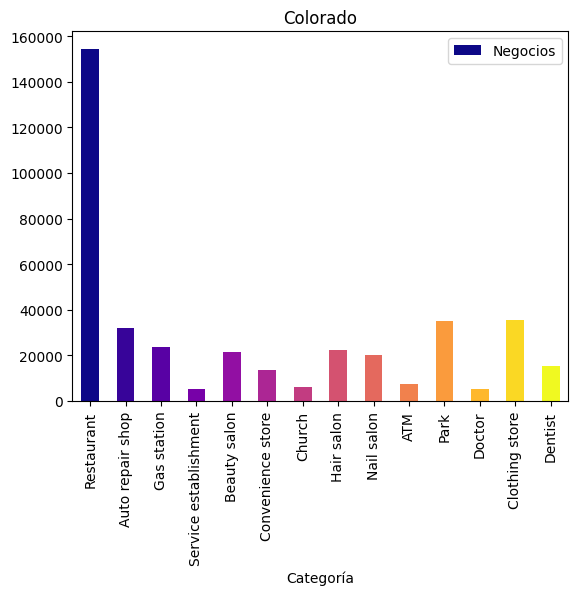

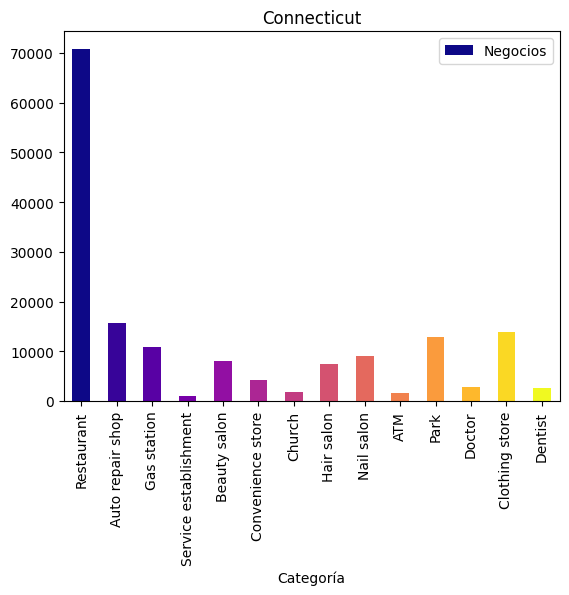

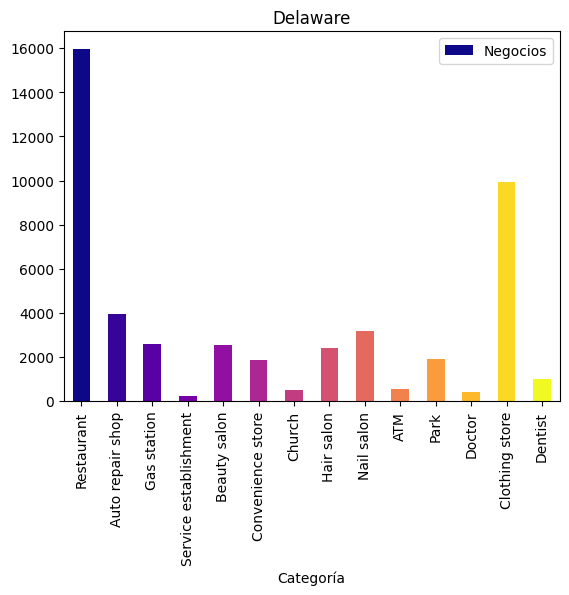

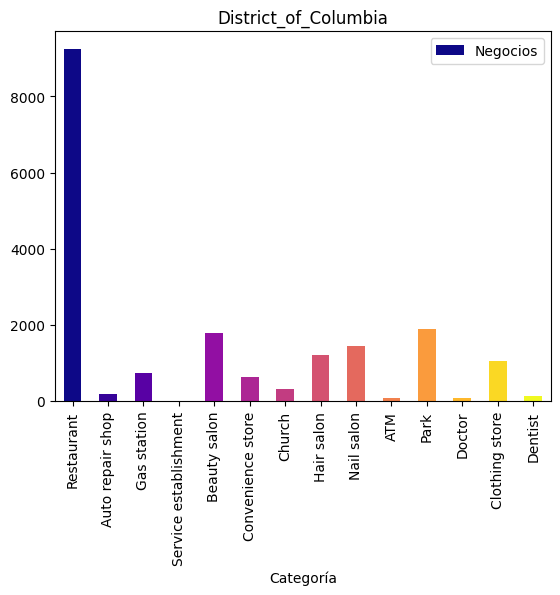

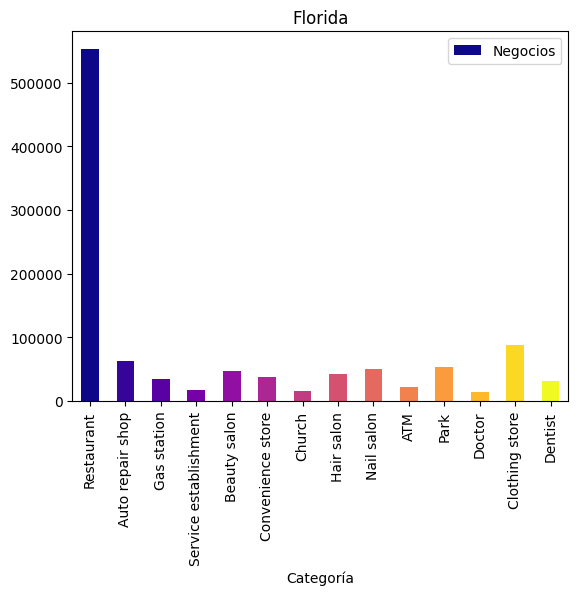

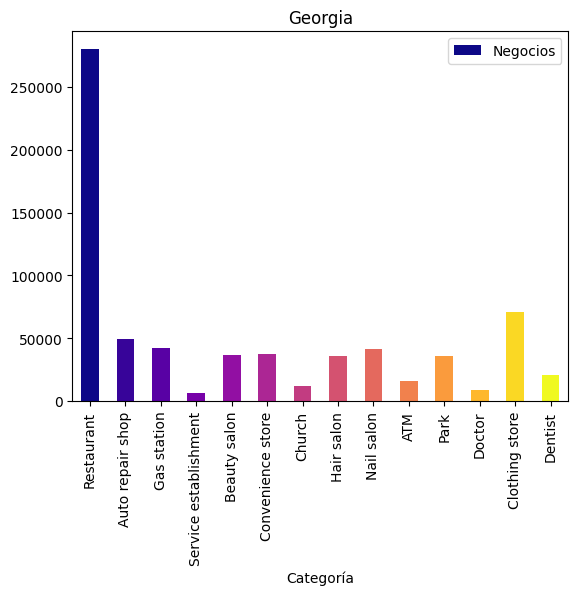

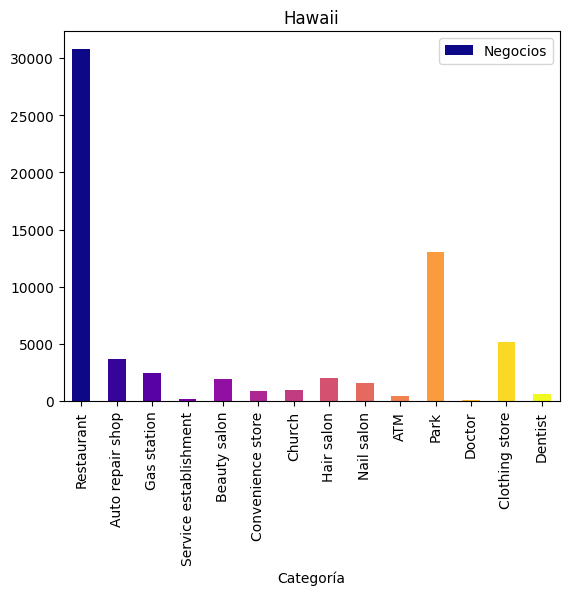

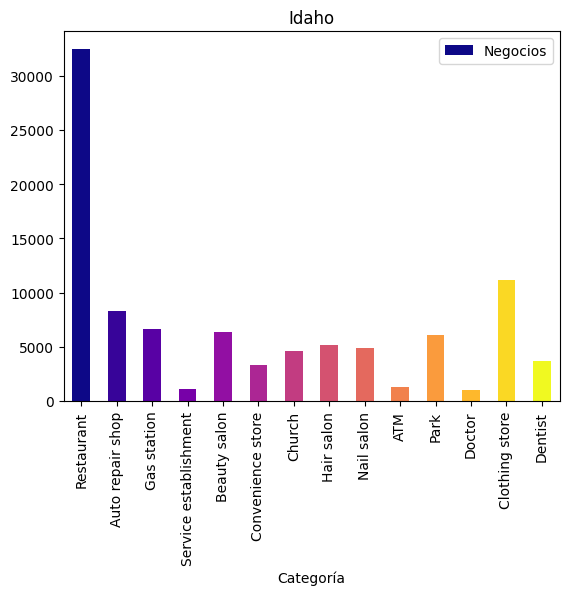

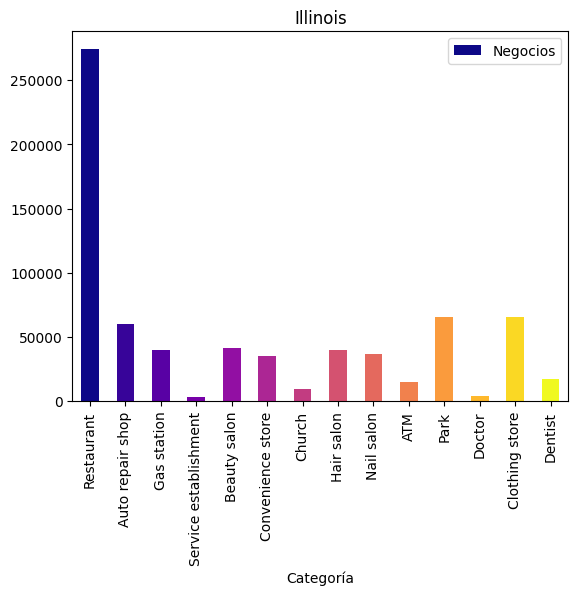

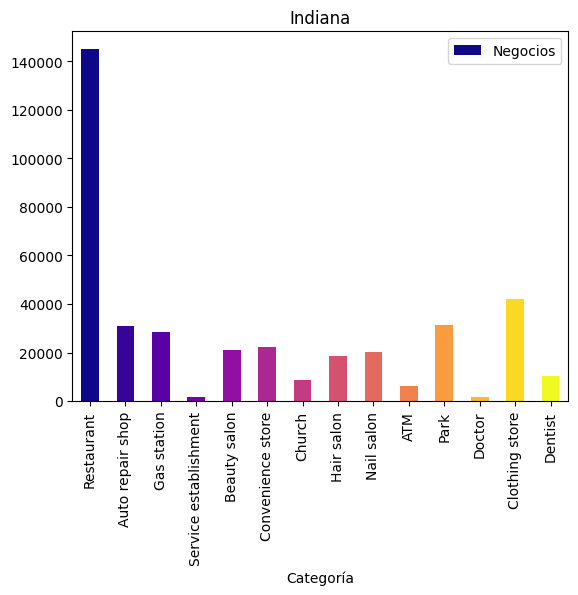

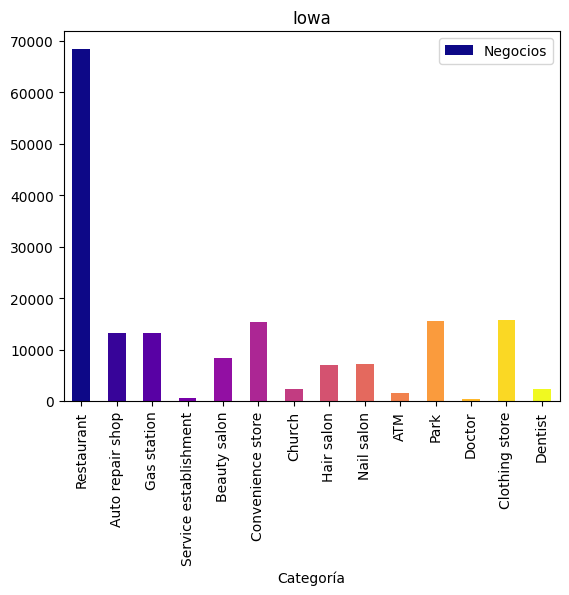

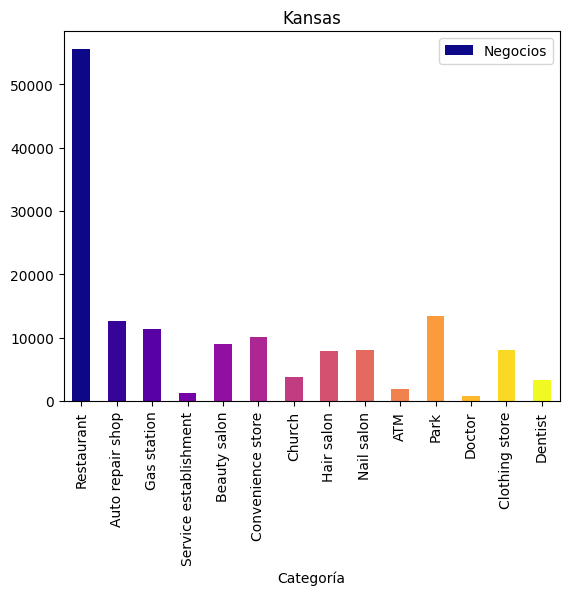

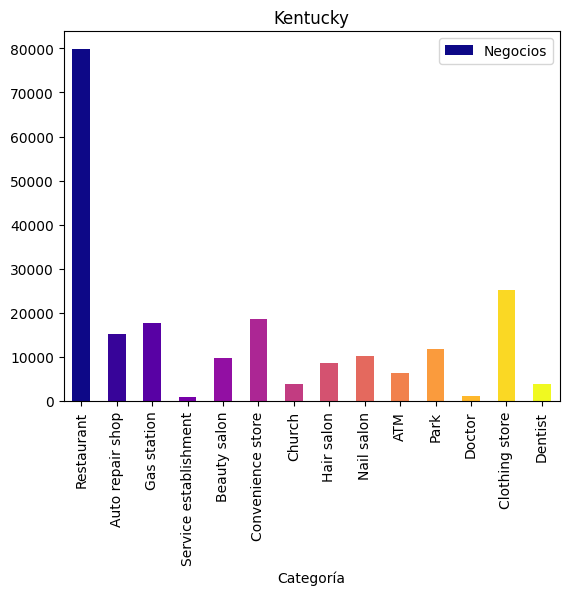

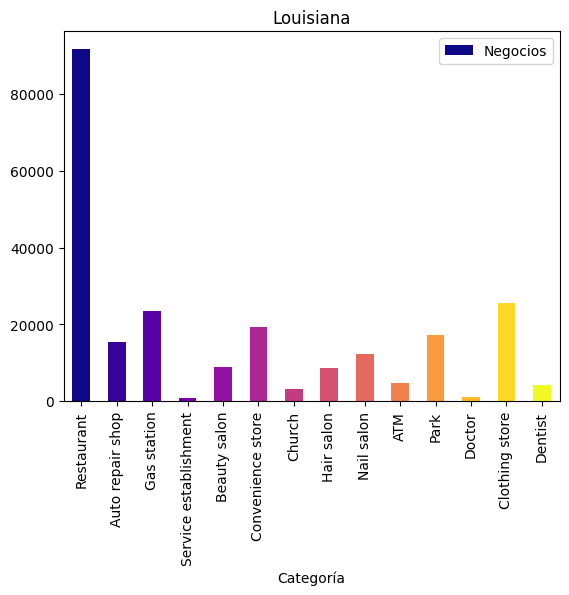

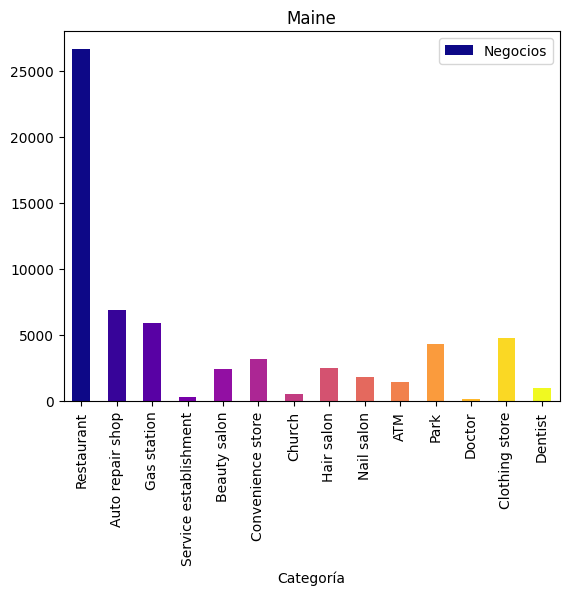

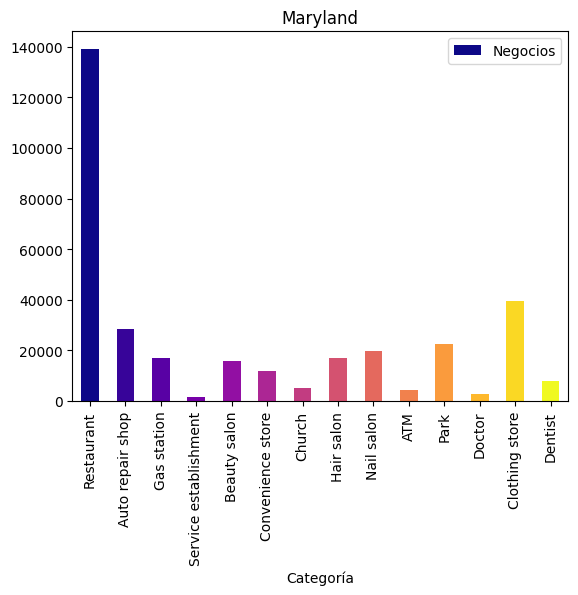

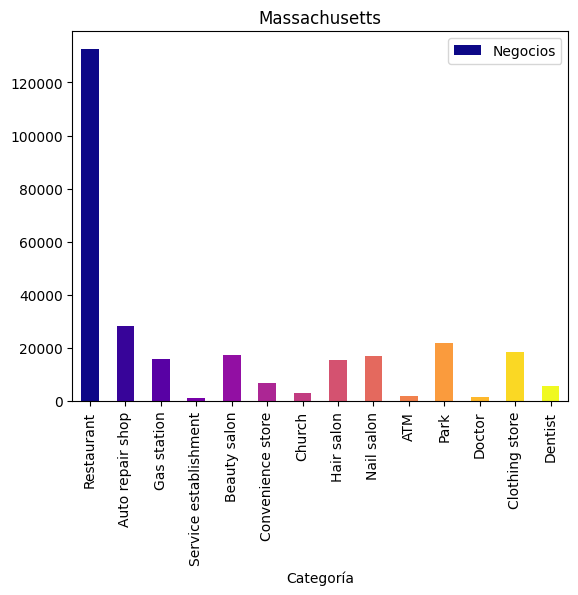

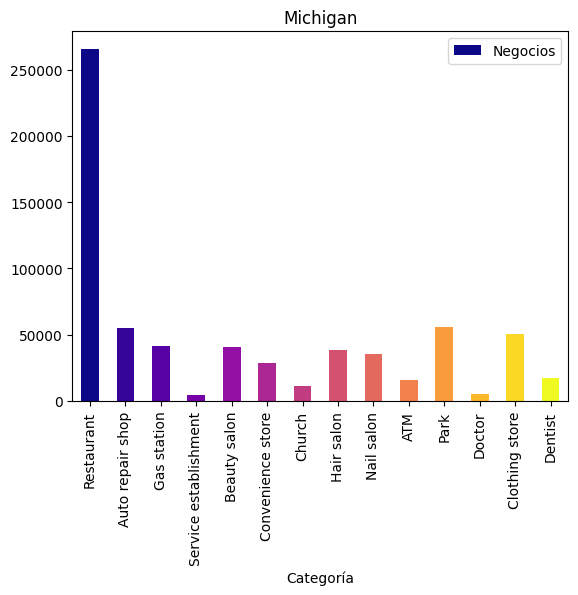

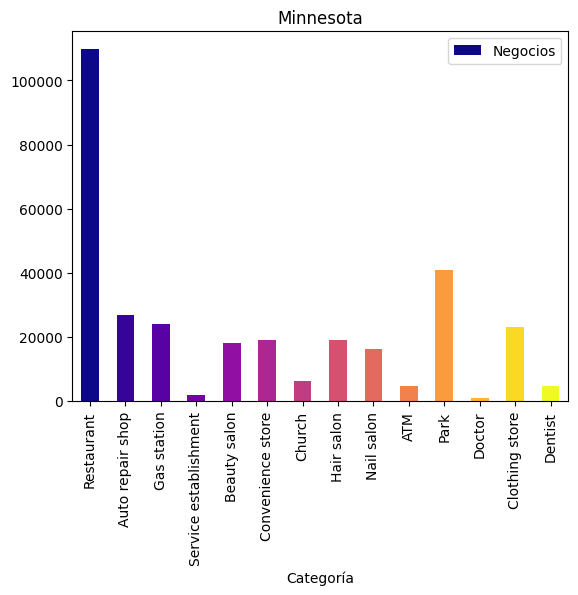

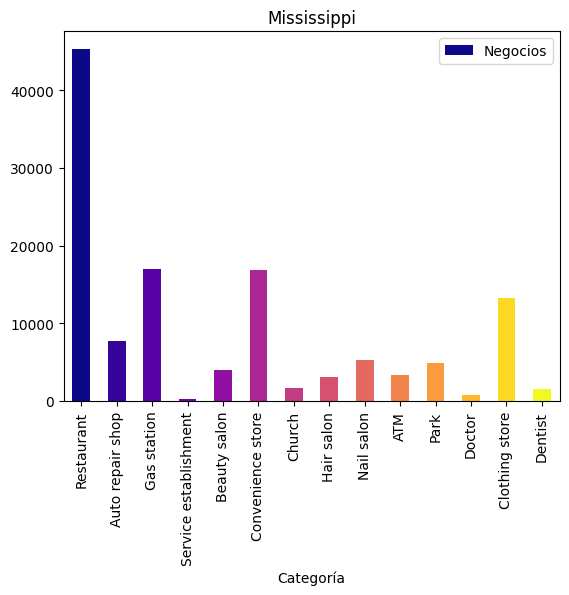

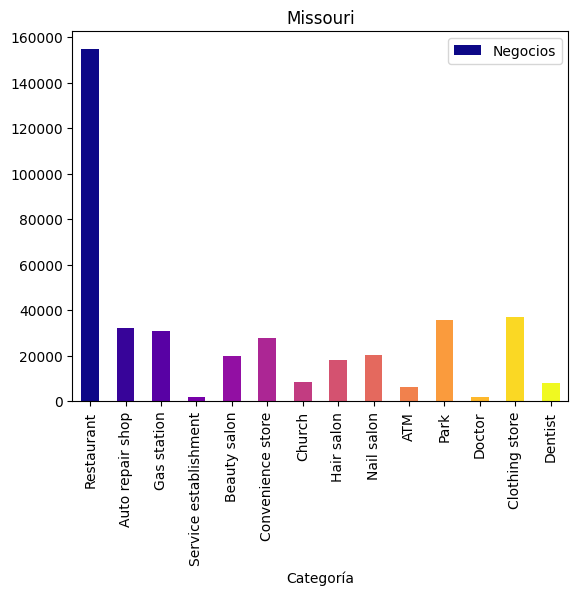

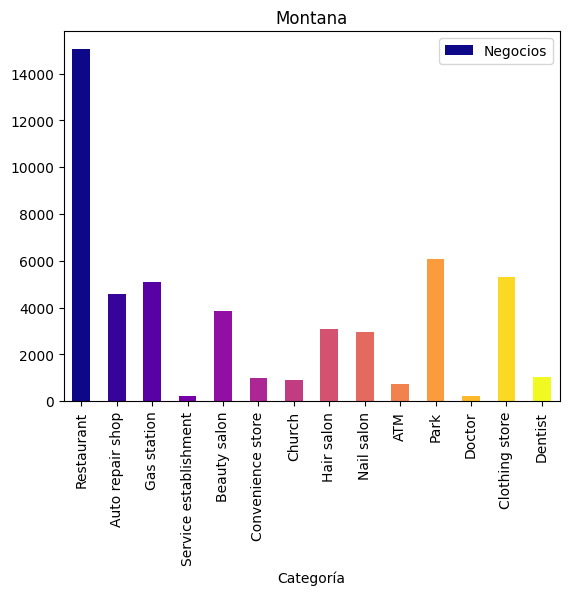

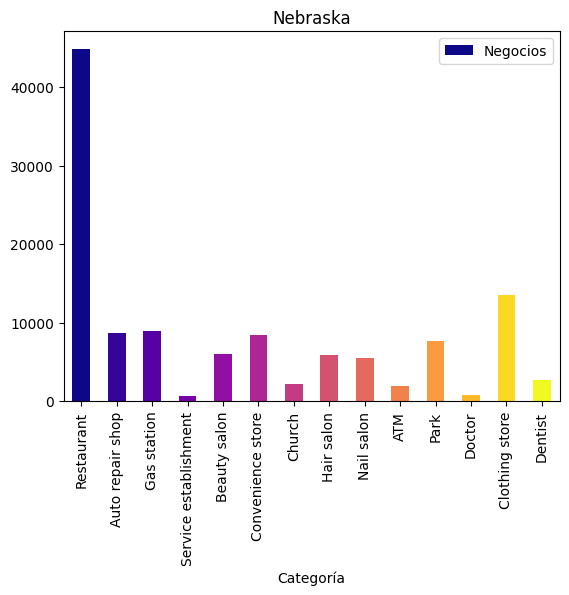

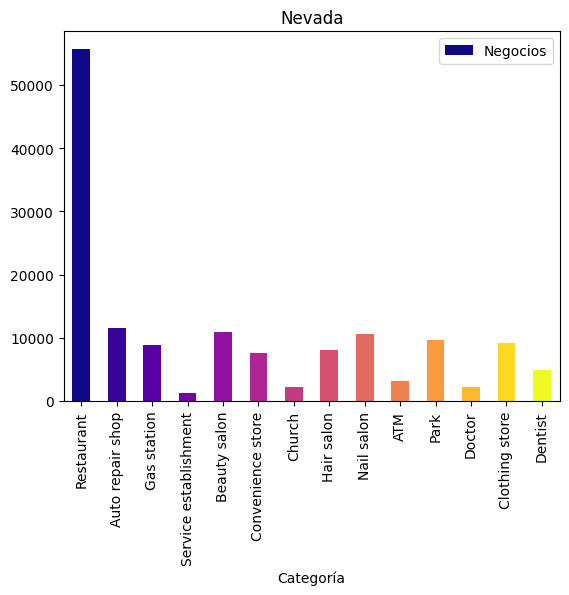

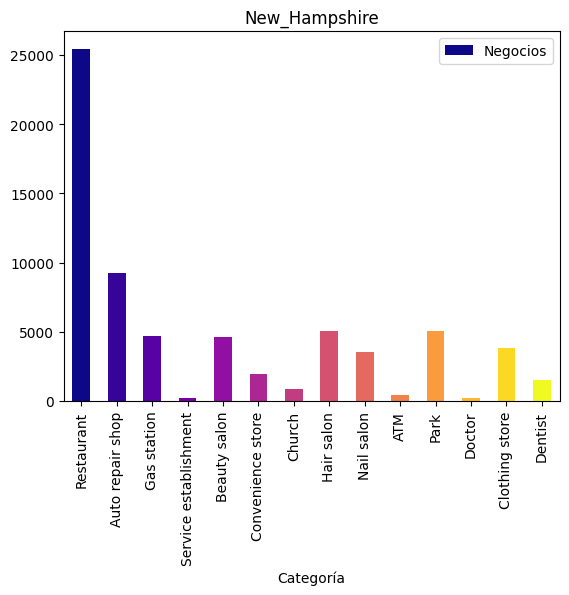

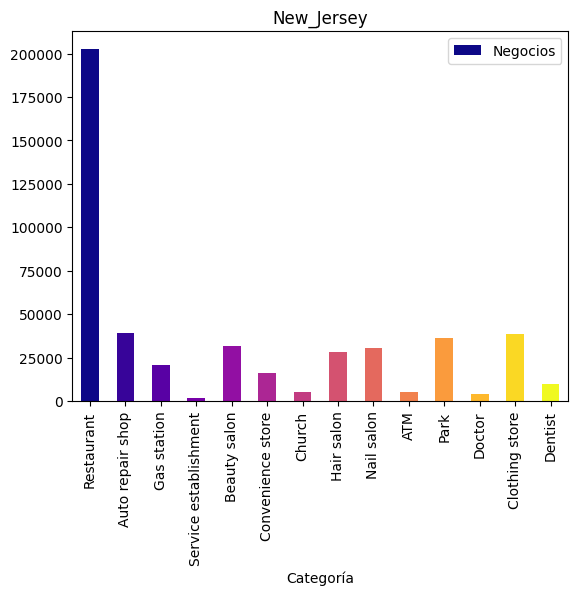

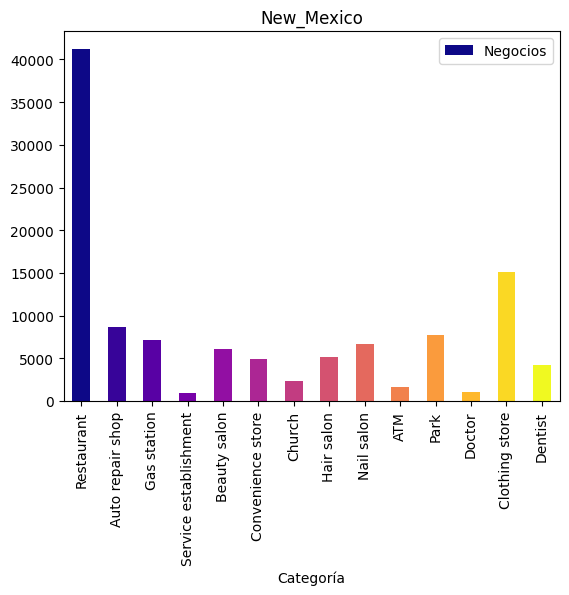

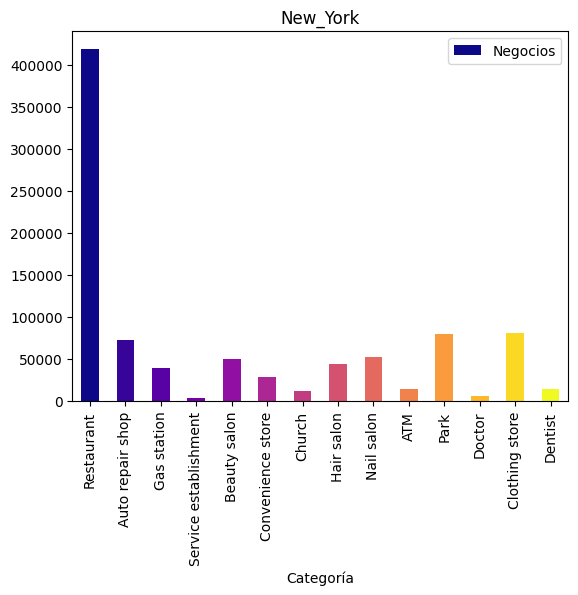

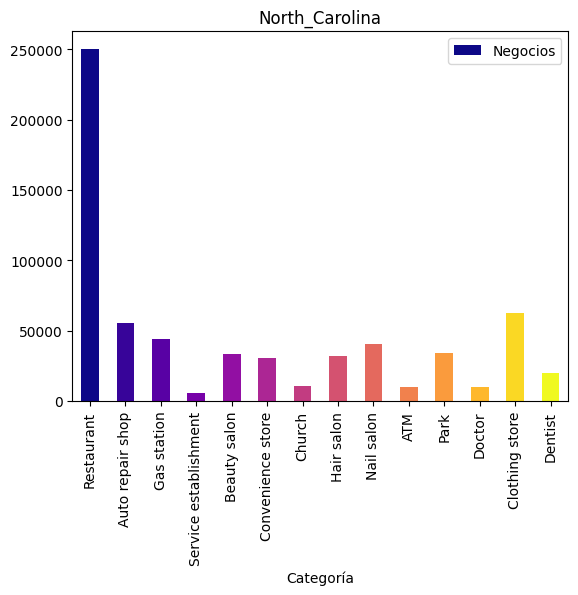

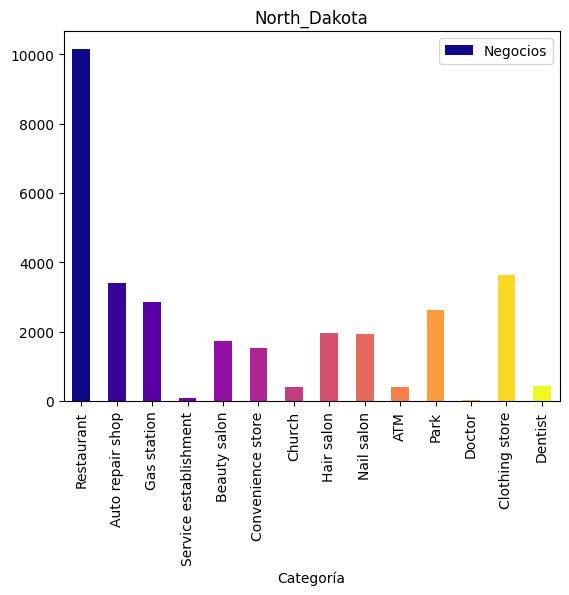

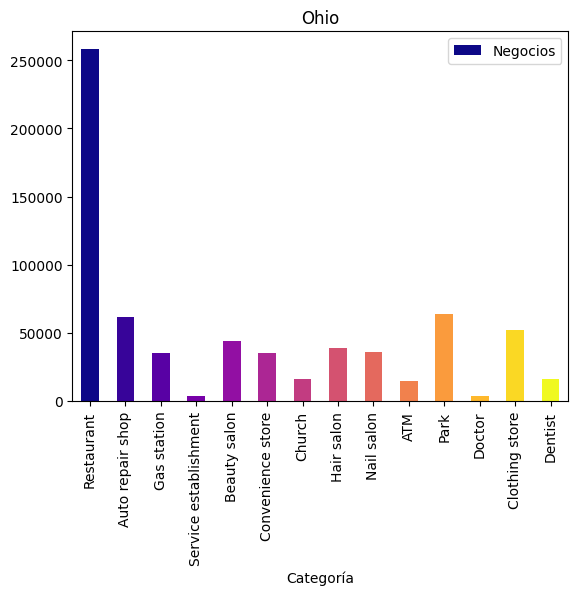

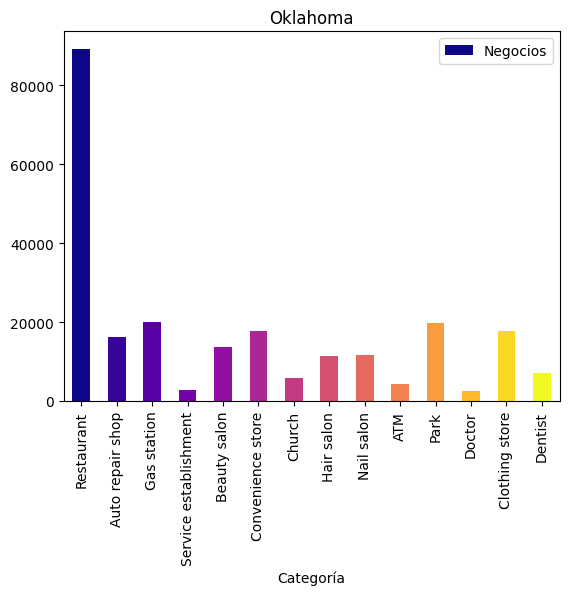

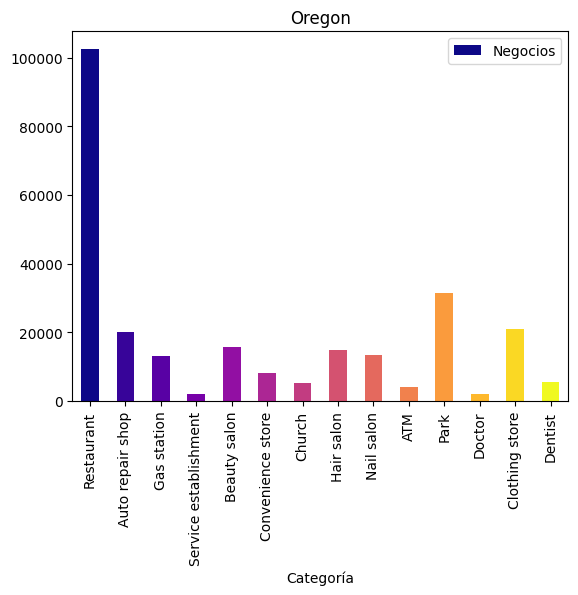

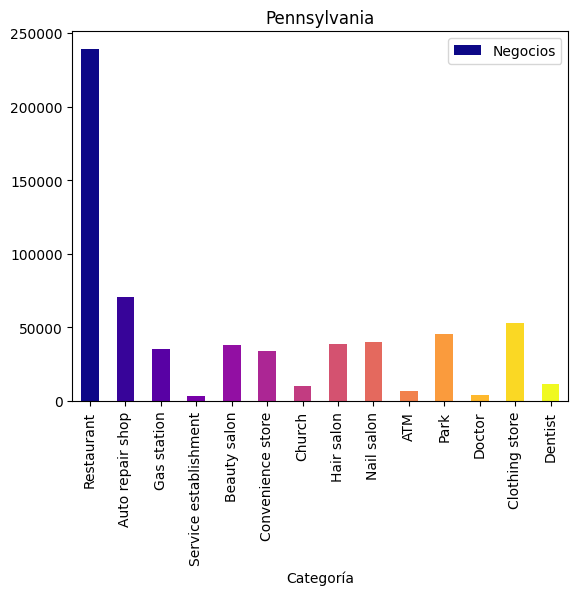

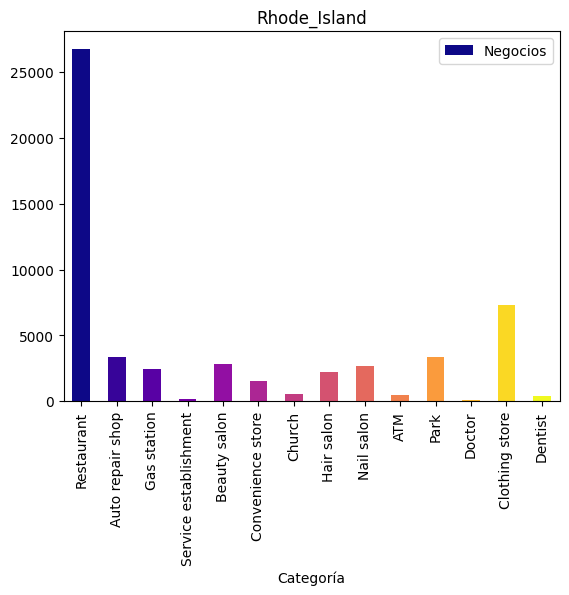

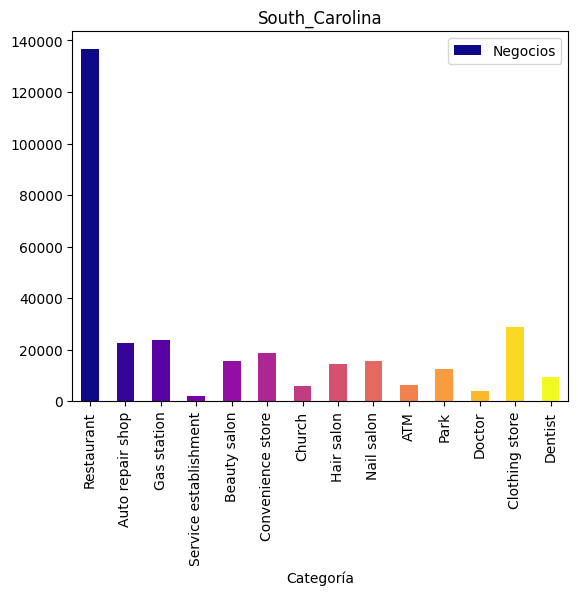

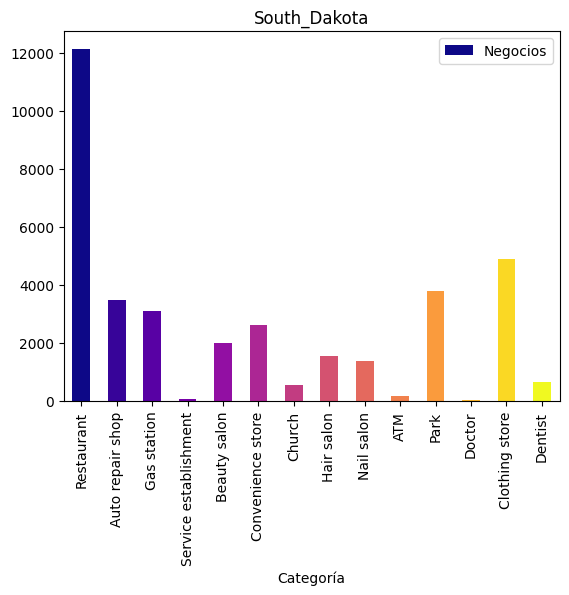

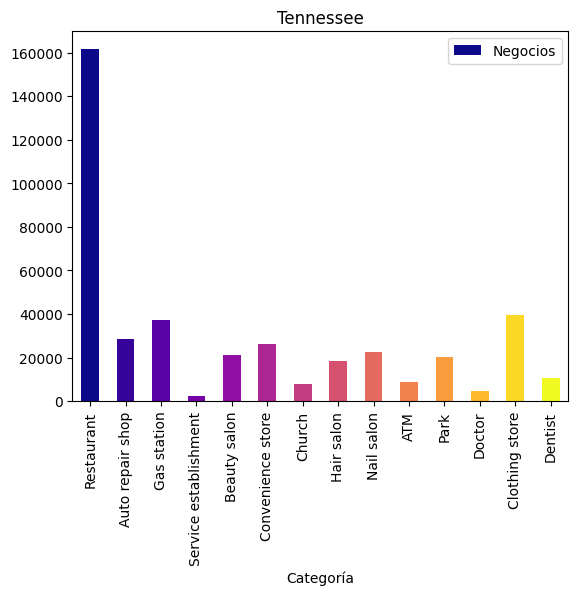

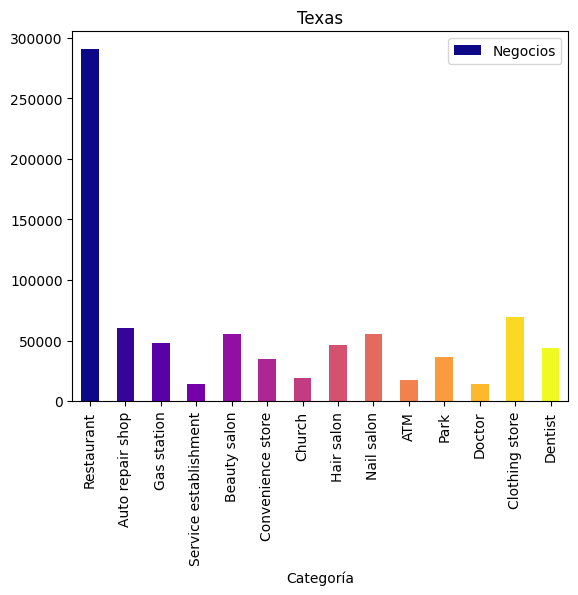

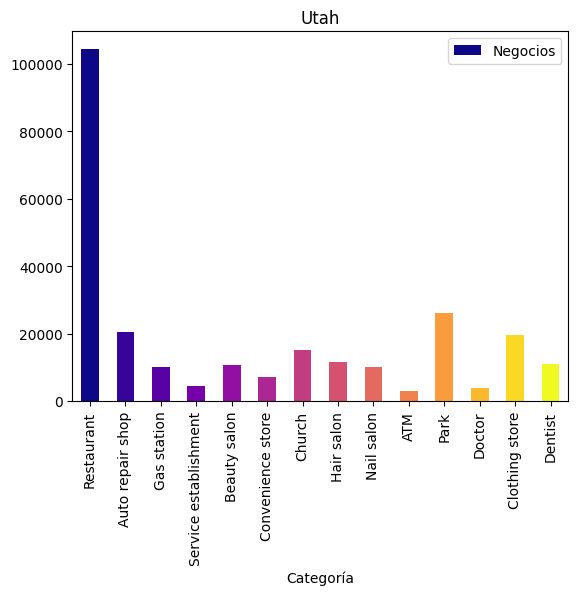

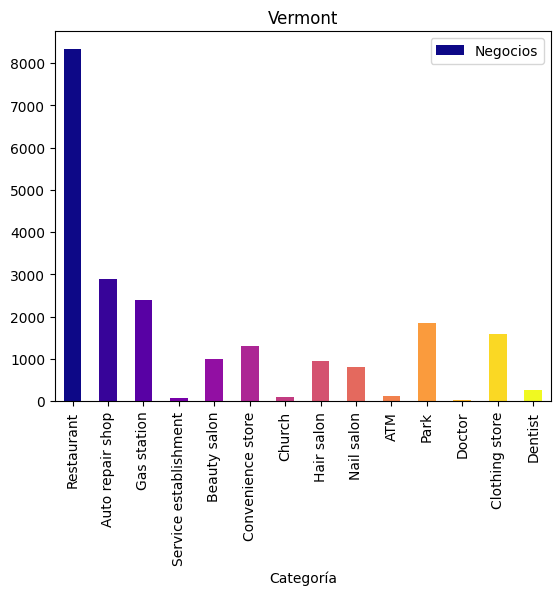

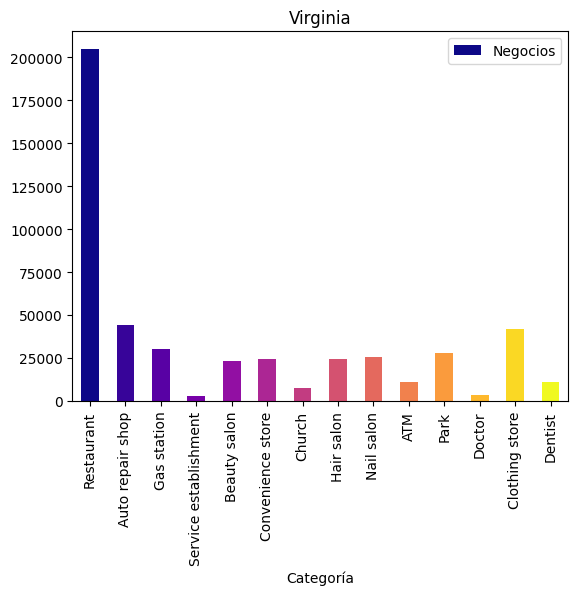

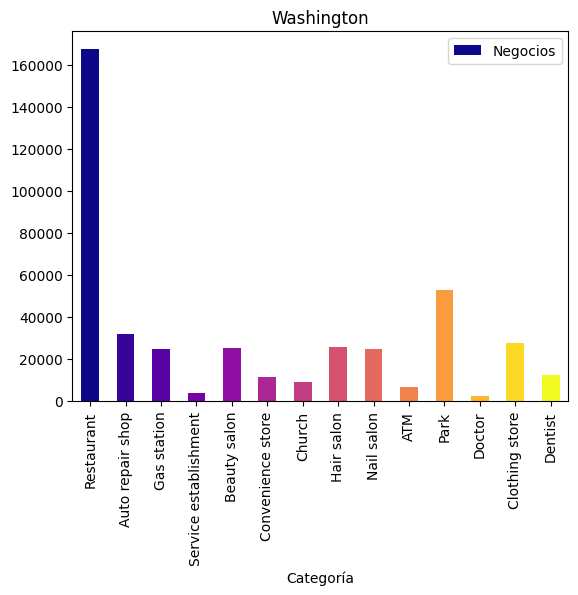

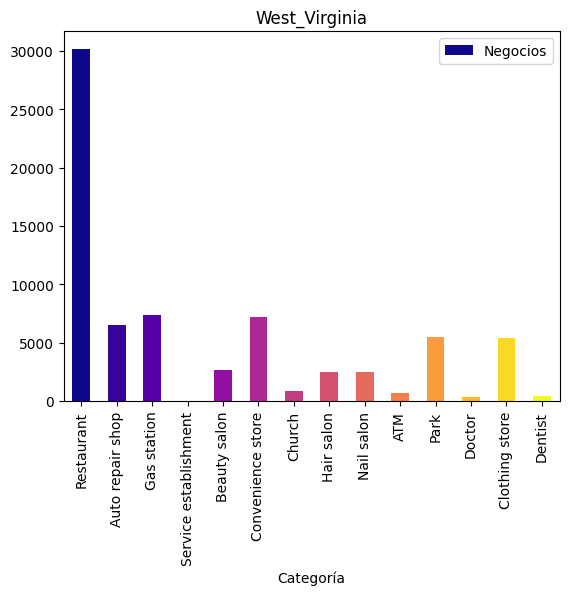

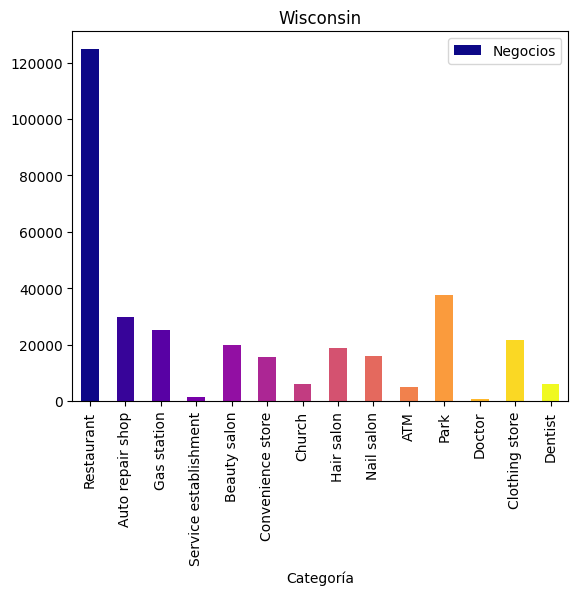

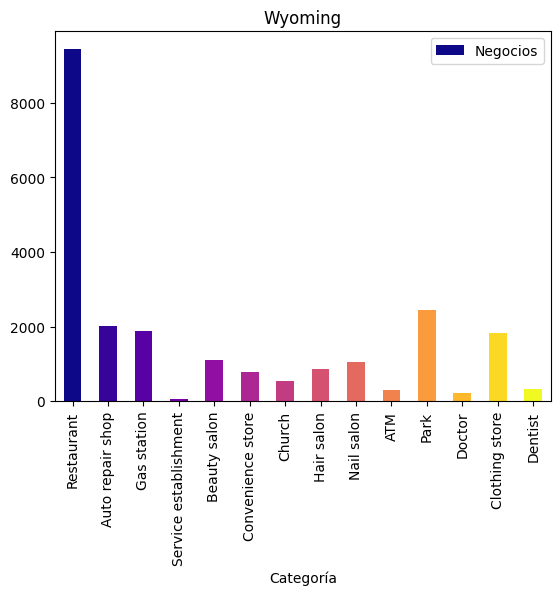

In [81]:

import numpy as np

# Selecciona las columnas que te interesan
df = df_clpe[['Restaurant', 'Auto repair shop', 'Gas station', 'Service establishment', 'Beauty salon', 'Convenience store', 'Church', 'Hair salon', 'Nail salon', 'ATM', 'Park', 'Doctor', 'Clothing store', 'Dentist', 'Estado_limpio']]

# Renombra las columnas
df.columns = ['Restaurant', 'Auto repair shop', 'Gas station', 'Service establishment', 'Beauty salon', 'Convenience store', 'Church', 'Hair salon', 'Nail salon', 'ATM', 'Park', 'Doctor', 'Clothing store', 'Dentist', 'Estado']

# Reshape el DataFrame
df_reshaped = df.melt(id_vars='Estado', var_name='Categoría', value_name='Negocios')

cmap = plt.get_cmap('plasma') # Ajusta 'YlOrBr' a la paleta de colores que prefieras

for estado in df_reshaped['Estado'].unique():
 # Filtra el DataFrame para incluir solo las filas para este estado
 df_estado = df_reshaped[df_reshaped['Estado'] == estado]
 
 # Crea un array de colores
 colors = cmap(np.linspace(0, 1, len(df_estado)))
 
 # Crea un gráfico de barras para este estado
 ax = df_estado.plot.bar(x='Categoría', y='Negocios', rot=90, color=colors)
 
 # Establece el título del gráfico como el nombre del estado
 ax.set_title(estado)

 # Muestra el gráfico
 plt.show()


In [58]:
df_reshaped

,Estado,Categoría,Negocios
0,Alabama,Restaurant,103948.0
1,Alaska,Restaurant,9781.0
2,Arizona,Restaurant,179946.0
3,Arkansas,Restaurant,55150.0
4,California,Restaurant,395627.0
...,...,...,...
709,Virginia,Dentist,11334.0
710,Washington,Dentist,12303.0
711,West_Virginia,Dentist,445.0
712,Wisconsin,Dentist,6101.0


### busqueda de valores nulos en todos los estados

In [14]:


def count_nulls(df):
  return df.isna().sum()

# Lista todos los archivos en la carpeta 'google parquet'
files = os.listdir("..\\google parquet")

# Procesa cada archivo
for file in files:
   # Lee el archivo
   df = pd.read_parquet(f"..\\google parquet\\{file}")
   
   # Cuenta los valores nulos
   nulls = count_nulls(df)
   
   # Imprime los valores nulos
   print("-- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- ")
   print(f"Nulls in {file}:")
   print(nulls)


-- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- 
Nulls in all_Alabama.parquet:
user_id            0
name               0
time               0
rating             0
text          833399
pics         1763830
gmap_id            0
resp_time    1592717
resp_text    1592717
dtype: int64
-- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- 
Nulls in all_Alaska.parquet:
user_id           0
name              0
time              0
rating            0
text         223258
pics         500664
gmap_id           0
resp_time    477283
resp_text    477283
dtype: int64
-- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- 
Nulls in all_Arizona.parquet:
user_id            0
name               0
time               0
rating             0
text          832184
pics         2036129
gmap_id            0
resp_time    1760851
resp_text    1760851
dtype: int64
-- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * -- * --

### compruebo si un user_id en especifico no se encuentra en otros estados

In [15]:

# Lista todos los archivos en la carpeta 'google parquet'
files = os.listdir("..\\google parquet")

# Crea una serie con el ID de usuario
user_id = 1.140438e+20	
user_id_series = pd.Series([user_id])

# Procesa cada archivo
for file in files:
  # Lee el archivo
  df = pd.read_parquet(f"..\\google parquet\\{file}")
  
  # Verifica si el ID de usuario está en el DataFrame
  print(f"El ID de usuario {user_id} está en el DataFrame {file}:")
  print(user_id_series.isin(df['user_id']).values[0])


El ID de usuario 1.140438e+20 está en el DataFrame all_Alabama.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Alaska.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Arizona.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Arkansas.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_California.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Colorado.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Connecticut.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Delaware.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_District_of_Columbia.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Florida.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Georgia.parquet:
False
El ID de usuario 1.140438e+20 está en el DataFrame all_Hawaii.parquet:
False
El ID de usuario 1.140438e+20 está en el Da

### se realiza un mapeo de los user_id en cada uno de los estados

In [ ]:

# Lista todos los archivos en la carpeta 'google parquet'
# files = os.listdir("..\\google parquet")

# Procesa cada archivo
# for file in files:
#  Lee el archivo
#  df = pd.read_parquet(f"..\\google parquet\\{file}")
 
#  Crea un diccionario de mapeo para los IDs de usuario
#  user_id_mapping = pd.Series(df['user_id']).factorize()[0]
 
#  Reemplaza los IDs de usuario en el DataFrame
#  df['user_id'] = user_id_mapping
 
#  Guarda el DataFrame transformado
#  df.to_parquet(f"..\\google parquet\\{file}")


In [ ]:
# df_Alabama = pd.read_parquet("..\\google parquet\\all_Alabama.parquet")
# df_Alabama

### se elimina la columna pics de todos los estados

In [ ]:
# Lista todos los archivos en la carpeta 'google parquet'
files = os.listdir("..\\google parquet")

# Procesa cada archivo
for file in files:
 # Lee el archivo
 df = pd.read_parquet(f"..\\google parquet\\{file}")
 
 # Elimina la columna 'pics'
 df = df.drop('pics', axis=1, errors='ignore')
 
 # Guarda el DataFrame transformado
 df.to_parquet(f"..\\google parquet\\{file}")

In [4]:

folder_path = "..\\google parquet"
files = os.listdir(folder_path)

In [ ]:
# Procesa cada archivo
for file in files:
   # Lee el archivo
   df = pd.read_parquet(f"{folder_path}\\{file}")

   # Explode la columna 'category'
   df = df.explode('category')

   # Agrupa por 'category' y calcula el promedio de 'avg_rating'
   df_sorted = df.groupby('category')['avg_rating'].mean().sort_values(ascending=False)

   # Obtiene las 10 categorías con más rating
   top_10_categories = df_sorted.head(10)

   # Grafica las 10 categorías con más rating
   top_10_categories.plot.bar()
   plt.show()


In [ ]:

# Explota la columna 'category'
df = df_Alabama.explode('category')

# Cuenta cuántas veces aparece cada categoría
category_counts = df['category'].value_counts()

# Imprime los recuentos de categoría
print(category_counts)

In [ ]:
import pprint
metadata_sitios = pd.read_csv('..\\GP_Henry\\metadata.csv')
metadata_sitios = metadata_sitios[['gmap_id', 'category']]

files = os.listdir("..\\google parquet")
category_counts_dict = {}

for file in files:
  # Lee el archivo
  df = pd.read_parquet(f"{folder_path}\\{file}")

  # Selecciona solo la columna 'gmap_id'
  df = df[['gmap_id']]

  # Realiza un merge con el archivo 'metadata-sitios'
  df_merged = pd.merge(df, metadata_sitios, on='gmap_id')

  # Explota la columna 'category'
  df_merged = df_merged.explode('category')

  # Cuenta cuántas veces aparece cada categoría
  category_counts = df_merged['category'].value_counts()

  # Selecciona las 10 categorías que más se repiten
  print(" --   --   --   --   --   --   -- ")
  category_counts.head(10)


In [ ]:

expanded_categories = meta['category'].explode().dropna()

cantidad_por_categoria = expanded_categories.value_counts()

categorias_mas_de_30 = cantidad_por_categoria[cantidad_por_categoria > 30000]

print(categorias_mas_de_30)